<a href="https://colab.research.google.com/github/Sambu-Armstrong/Mobile_Price_Range_Classification/blob/main/%22Mobile_Price_Range_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving MobilePriceRange.csv to MobilePriceRange.csv


In [2]:
# confirming
df = pd.read_csv('MobilePriceRange.csv')

df.head()

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


**DATA CLEANING**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BatteryPower    2000 non-null   int64  
 1   InternalMemory  2000 non-null   int64  
 2   ClockSpeed      2000 non-null   float64
 3   NoOfCores       2000 non-null   int64  
 4   RAM             2000 non-null   int64  
 5   TalkTime        2000 non-null   int64  
 6   DualSim         2000 non-null   int64  
 7   3G              2000 non-null   int64  
 8   4G              2000 non-null   int64  
 9   WiFi            2000 non-null   int64  
 10  Bluetooth       2000 non-null   int64  
 11  MobileDepth     2000 non-null   float64
 12  MobileWeight    2000 non-null   int64  
 13  TouchScreen     2000 non-null   int64  
 14  ScreenHeight    2000 non-null   int64  
 15  ScreenWidth     2000 non-null   int64  
 16  FrontCameraPx   2000 non-null   int64  
 17  RearCameraPX    2000 non-null   i

In [4]:
# Check the unique values in the 'PriceRange' column
print(df['PriceRange'].unique())

['Medium' 'High' 'VeryHigh' 'Low']


In [5]:
# Confirming no null values for the report
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 BatteryPower      0
InternalMemory    0
ClockSpeed        0
NoOfCores         0
RAM               0
TalkTime          0
DualSim           0
3G                0
4G                0
WiFi              0
Bluetooth         0
MobileDepth       0
MobileWeight      0
TouchScreen       0
ScreenHeight      0
ScreenWidth       0
FrontCameraPx     0
RearCameraPX      0
PxHeight          0
PxWeight          0
PriceRange        0
dtype: int64


In [6]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


**DATA ANALYSIS PART**

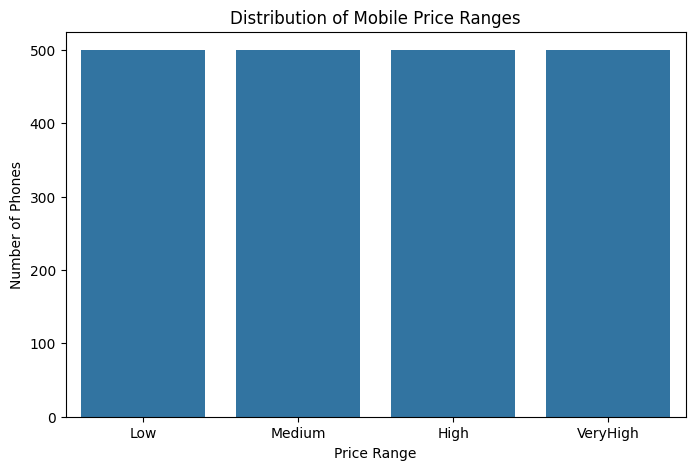

PriceRange
Medium      500
High        500
VeryHigh    500
Low         500
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of Price Ranges
plt.figure(figsize=(8, 5))
sns.countplot(x='PriceRange', data=df, order=['Low', 'Medium', 'High', 'VeryHigh'])
plt.title('Distribution of Mobile Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.show()

#print exact counts
print(df['PriceRange'].value_counts())

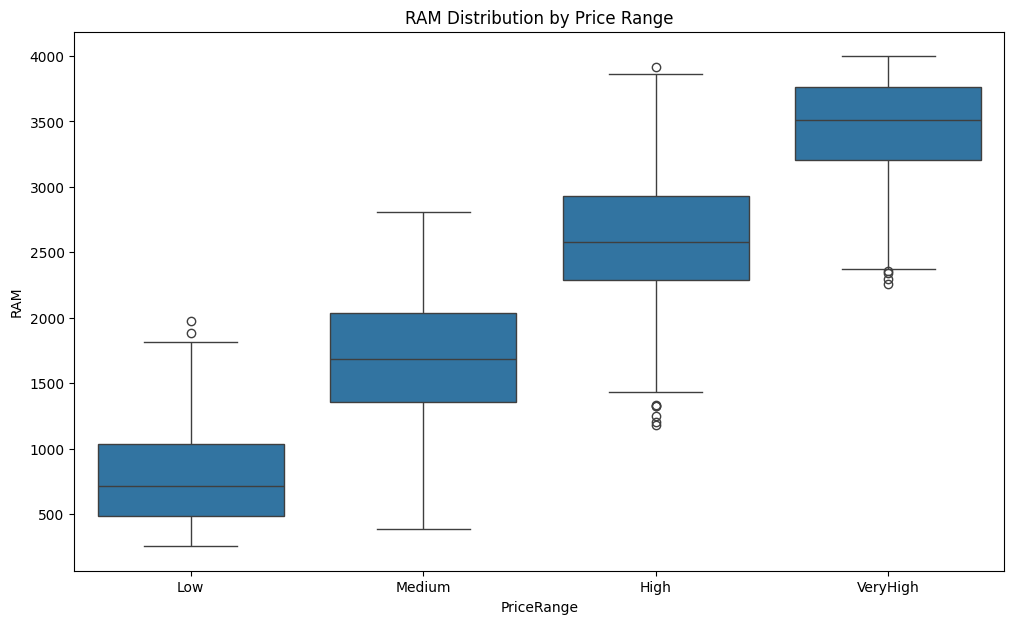

In [8]:
#RAM vs Price Range
plt.figure(figsize=(12, 7))
sns.boxplot(x='PriceRange', y='RAM', data=df, order=['Low', 'Medium', 'High', 'VeryHigh'])
plt.title('RAM Distribution by Price Range')
plt.show()

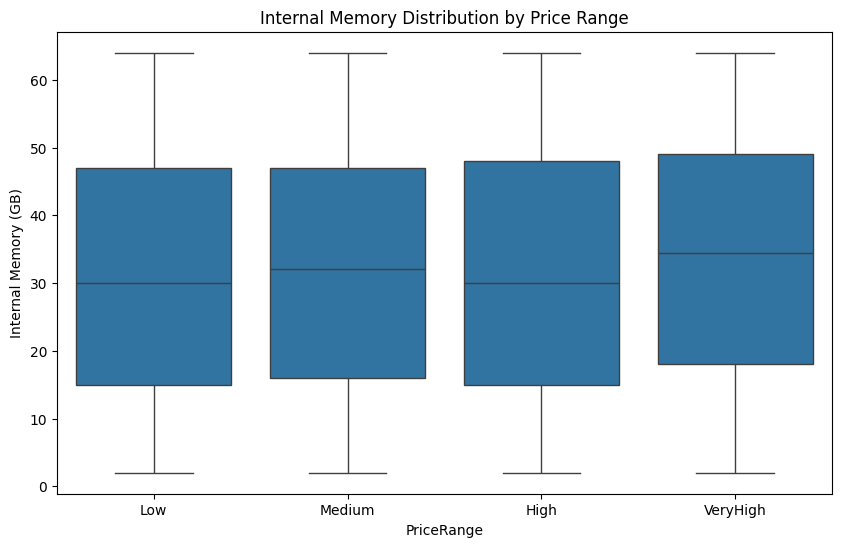

In [9]:
# Internal Memory vs Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(x='PriceRange', y='InternalMemory', data=df, order=['Low', 'Medium', 'High', 'VeryHigh'])
plt.title('Internal Memory Distribution by Price Range')
plt.ylabel('Internal Memory (GB)')
plt.show()

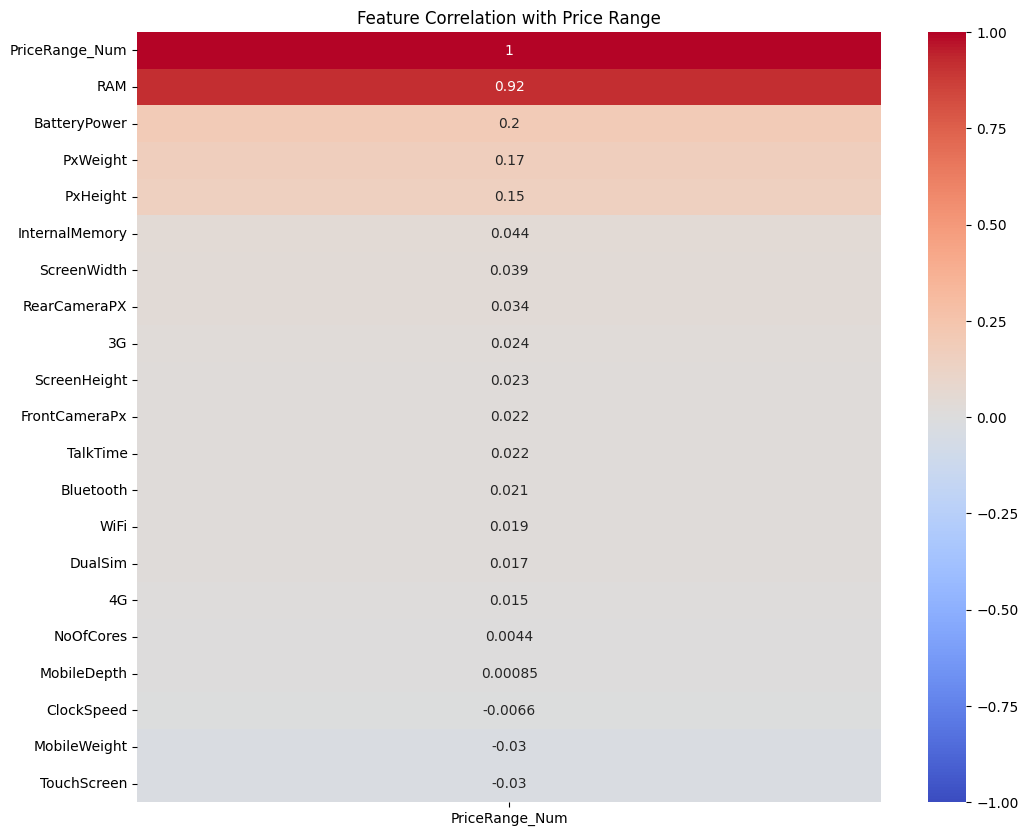

In [10]:
# Correlation Heatmap including Price
# Create a temporary copy with numeric price for correlation
df_temp = df.copy()
price_map = {'Low': 0, 'Medium': 1, 'High': 2, 'VeryHigh': 3}
df_temp['PriceRange_Num'] = df_temp['PriceRange'].map(price_map)

plt.figure(figsize=(12, 10))
# Calculate correlation
corr = df_temp.corr(numeric_only=True)
# Plot heatmap
sns.heatmap(corr[['PriceRange_Num']].sort_values(by='PriceRange_Num', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Price Range')
plt.show()

**Insights**


1. All the price ranges(low, medium, high, very high) have an equal distribution of 500 phones in each category.
2.  As the RAM increases so does the price range move from low to very high, this shows that RAM is a key determiner for price. The higher the RAM, the higher the price.
3. The boxes are overlapping showing a cheap phone might have a 20GB or 40GB, and an expensive one might have the exact same. This means that internal memory is not a major determiner of price.
4. The heatmap shows a high correlation(92%) between RAM and Price compared to other features(20% and below). This means that RAM is the main determiner of price. This shows that customers value the RAM more and the other features are just a bonus.







#Question 3:Create a model based on the k-Nearest Neighbours algorithm for classification based on at least 2 suitable features for one target variable. Verify the optimal k for classification.

In [11]:
# choosing the best features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# convert price range to numbers
df_corr = df.copy()
df_corr['PriceRange_Num'] = df_corr['PriceRange'].map({'Low':0, 'Medium':1, 'High':2, 'VeryHigh':3})

# calculate Pearson Correlation with the Target (PriceRange_Num)
correlations = df_corr.corr(numeric_only=True)['PriceRange_Num'].abs().sort_values(ascending=False)

print("Correlation Scores")
print(correlations)

# selecting features with correlation above 0.05
# drop 'PriceRange' and 'PriceRange_Num' from the list
selected_features = correlations[correlations > 0.05].index.tolist()
selected_features.remove('PriceRange_Num')

print(f"\nSelected {len(selected_features)} Best Features: {selected_features}")

Correlation Scores
PriceRange_Num    1.000000
RAM               0.917046
BatteryPower      0.200723
PxWeight          0.165818
PxHeight          0.148858
InternalMemory    0.044435
ScreenWidth       0.038711
RearCameraPX      0.033599
TouchScreen       0.030411
MobileWeight      0.030302
3G                0.023611
ScreenHeight      0.022986
FrontCameraPx     0.021998
TalkTime          0.021859
Bluetooth         0.020573
WiFi              0.018785
DualSim           0.017444
4G                0.014772
ClockSpeed        0.006606
NoOfCores         0.004399
MobileDepth       0.000853
Name: PriceRange_Num, dtype: float64

Selected 4 Best Features: ['RAM', 'BatteryPower', 'PxWeight', 'PxHeight']


In [12]:
# spliting training data from the testing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df[selected_features]
y = df['PriceRange']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)#80% for training and 20% testing

# feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"X_train shape:{x_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"X_test shape:{x_test.shape}")
print(f"y_test shape:{y_test.shape}")

print("Data scaling successful")

X_train shape:(1600, 4)
y_train shape:(1600,)
X_test shape:(400, 4)
y_test shape:(400,)
Data scaling successful


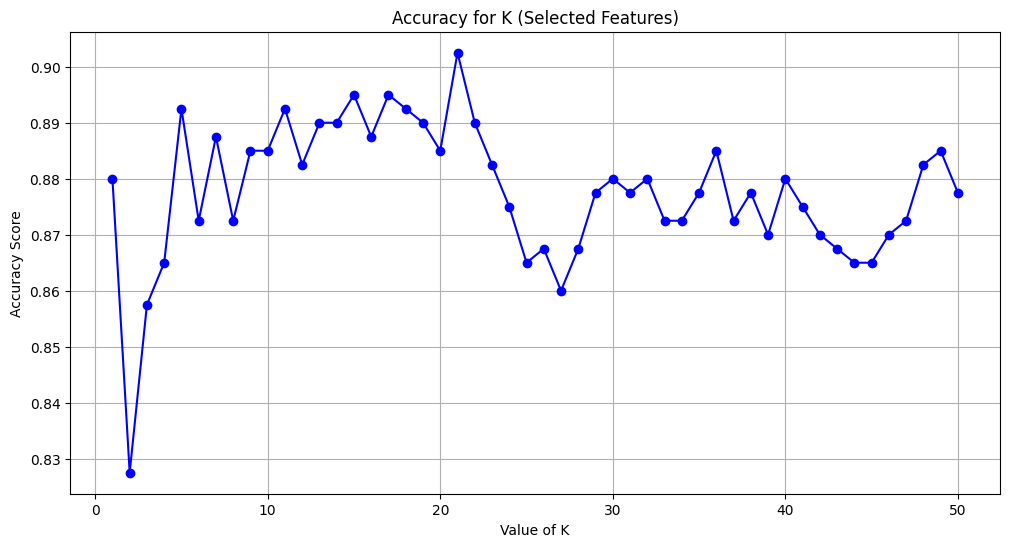

KNN Model (K=21) | Train Accuracy: 92.81% | Test Accuracy: 90.25%


In [13]:
# finding the optimal k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

scores = []

# loop for 50
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))

#graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), scores, marker='o', color='blue')
plt.title('Accuracy for K (Selected Features)')
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

#print the optimal K
best_k = range(1, 51)[scores.index(max(scores))]

# calculating train - test accuracy
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_scaled, y_train)
knn_train_acc = accuracy_score(y_train, knn_best.predict(x_train_scaled))
knn_test_acc = accuracy_score(y_test, knn_best.predict(x_test_scaled))

print(f"KNN Model (K={best_k}) | Train Accuracy: {knn_train_acc*100:.2f}% | Test Accuracy: {knn_test_acc*100:.2f}%")

# Question 4: Create another eager learning classifier as assigned based on at least 2 suitable features for one target variable.  

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=13)

#train the model (using the original unscaled data)
dt_model.fit(x_train, y_train)

# test the model
y_pred_dt = dt_model.predict(x_test)

#checking accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# calculating train accuracy
simple_train_acc = accuracy_score(y_train, dt_model.predict(x_train))

print(f"Accuracy: {dt_accuracy*100:.2f}%")
print(f"Train: {simple_train_acc*100:.2f}% | Test: {dt_accuracy*100:.2f}%")

Accuracy: 85.00%
Train: 100.00% | Test: 85.00%


# Question 5:Eager Learner Enhanced with hyperparameters

In [15]:
from sklearn.model_selection import GridSearchCV

#Define the list of settings we want to try
param_grid = {
    'max_depth': [5, 7, 9, 11, 13, 15, None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10]
}

# Create a Grid Search object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=13), param_grid, cv=5, scoring='accuracy')

# Run the search on the training data
grid_search.fit(x_train, y_train)

# get the best model found
best_dt_model = grid_search.best_estimator_

# test the model
tuned_pred = best_dt_model.predict(x_test)
tuned_accuracy = accuracy_score(y_test, tuned_pred)

tuned_train_pred = best_dt_model.predict(x_train)
tuned_train_acc = accuracy_score(y_train, tuned_train_pred)

print(f"Best Settings Found: {grid_search.best_params_}")
print(f"Train: {tuned_train_acc*100:.2f}%  | Test: {tuned_accuracy*100:.2f}%")

Best Settings Found: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2}
Train: 100.00%  | Test: 89.50%


# Question 6:Evaluate the Models' performance using confusion matrix metric

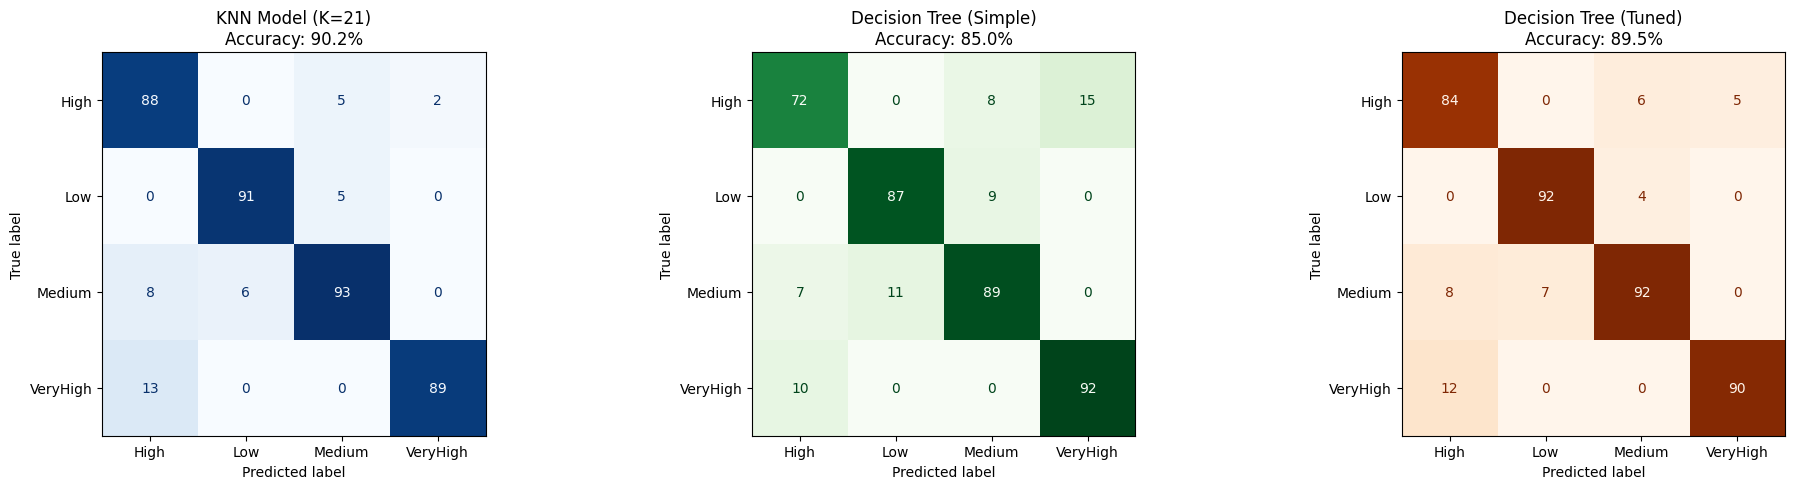

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#creating a figure with 3 charts side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# KNN model
# retrain it to ensure we have the best one
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_scaled, y_train)
knn_pred = knn_best.predict(x_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title(f'KNN Model (K={best_k})\nAccuracy: {accuracy_score(y_test, knn_pred)*100:.1f}%')

# Decision tree (simple)
# Using the dt_model created in Step 4
dt_pred_simple = dt_model.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, dt_pred_simple, ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title(f'Decision Tree (Simple)\nAccuracy: {accuracy_score(y_test, dt_pred_simple)*100:.1f}%')

# Decision Tree (Tuned)
# Using the best_dt_model in Step 5
dt_pred_tuned = best_dt_model.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, dt_pred_tuned, ax=axes[2], cmap='Oranges', colorbar=False)
axes[2].set_title(f'Decision Tree (Tuned)\nAccuracy: {accuracy_score(y_test, dt_pred_tuned)*100:.1f}%')

plt.tight_layout()
plt.show()

The KNN model has the highest accuracy, followed by decision tree with enhanced hyperparameters model. Then lastly the decision tree without enhanced hyperparameters. This because using the Pearson correlation to choose only the four most relevant features, we removed the noisy features becoming very efficient in measuring distance. The decision tree with enhanced hyperparameters helped reduce overfitting hence less errors.

# PROOF OF GROUPWORK
**GROUP NEXUS**

```
168205,Sambu Armstrong
146993,Mitesh Bhudia
166907,Ryan Kimutai
169205,Marvin Cheruiyot
165042,Ibrahim Omoi
168871,Joshua Were
145880,Derrick Kiprop
```
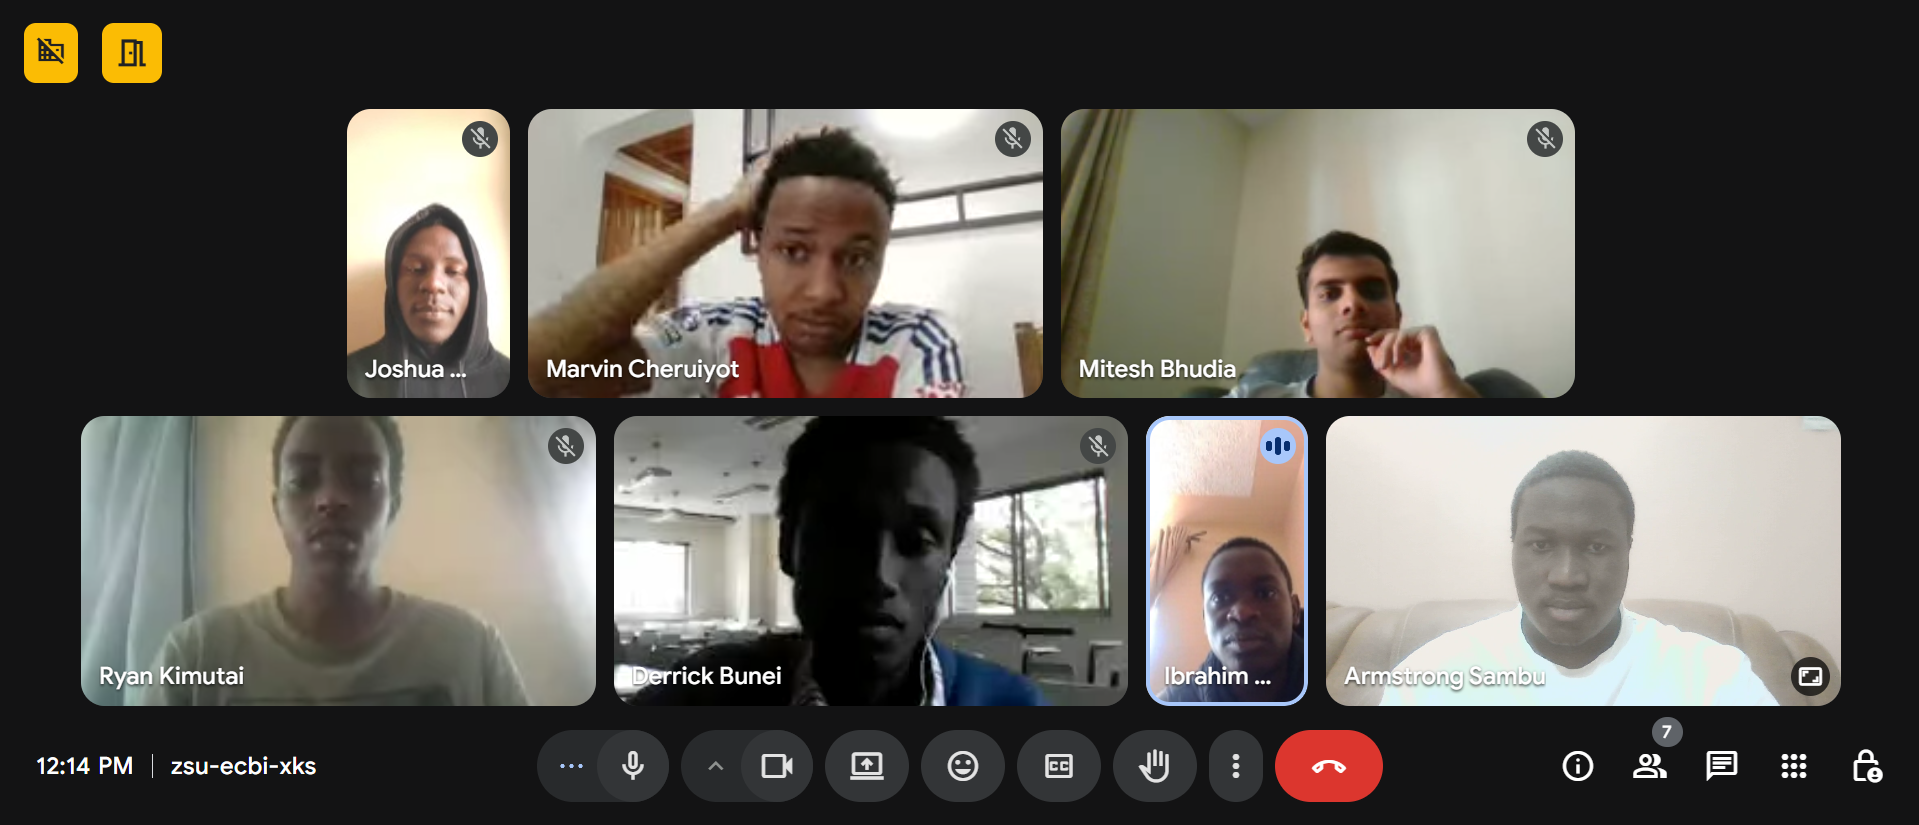
